# Exploración de Datos - Dataset Pebble Tracker IoT

## TFM: Arquitectura Big Data Escalable en AWS para el Procesamiento en Tiempo Real de Dispositivos IoT

**Autor:** Jose Dario Gonzalez Gomez  
**Dataset:** `exported/pebble-dataset.csv.gz` (6.5GB)

Este notebook contiene el análisis exploratorio de datos (EDA) del dataset de dispositivos Pebble Tracker, que será utilizado para el desarrollo del pipeline de procesamiento en tiempo real y detección de anomalías en AWS.

### Objetivos del Análisis:

1. Caracterizar la estructura y particularidades de los datos Pebble
2. Identificar patrones temporales y correlaciones entre sensores
3. Detectar valores faltantes y outliers
4. Analizar la distribución de las variables multisensor
5. Proporcionar insights para el diseño del pipeline de detección de anomalías

### ⚠️ Prerequisitos:

```bash
# Instalar dependencias necesarias
pip install pandas numpy matplotlib seaborn scikit-learn scipy jupyter
```


In [4]:
# Importaciones necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import json
import ast
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Librerías importadas correctamente")

Librerías importadas correctamente


In [5]:
# Carga del dataset
print("Cargando dataset de Pebble...")
try:
    # Cargar el archivo comprimido
    df = pd.read_csv('exported/pebble-dataset-2022.csv')

    print(f"✅ Dataset cargado exitosamente")
    print(
        f"📊 Dimensiones del dataset: {df.shape[0]:,} filas × {df.shape[1]} columnas")
    print(
        f"💾 Tamaño aproximado en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

except FileNotFoundError:
    print("❌ Error: No se pudo encontrar el archivo 'exported/pebble-dataset.csv.gz'")
except Exception as e:
    print(f"❌ Error al cargar el dataset: {e}")

Cargando dataset de Pebble...
✅ Dataset cargado exitosamente
📊 Dimensiones del dataset: 6,335,703 filas × 20 columnas
💾 Tamaño aproximado en memoria: 4250.18 MB


## 1. Análisis Estructural del Dataset

### 1.1 Vista General de los Datos

In [6]:
# Información general del dataset
print("=== INFORMACIÓN GENERAL DEL DATASET ===")
print(f"Número total de registros: {len(df):,}")
print(f"Número de columnas: {len(df.columns)}")
print(
    f"Periodo de datos: desde {df['created_at'].min()} hasta {df['created_at'].max()}")

print("\n=== COLUMNAS DEL DATASET ===")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n=== PRIMERAS 5 FILAS ===")
df.head()

=== INFORMACIÓN GENERAL DEL DATASET ===
Número total de registros: 6,335,703
Número de columnas: 20
Periodo de datos: desde 2022-01-01T00:02:09.452000 hasta 2022-12-31T23:59:57.807000

=== COLUMNAS DEL DATASET ===
 1. _id
 2. accelerometer
 3. created_at
 4. gas_resistance
 5. gyroscope
 6. humidity
 7. id
 8. imei
 9. latitude
10. light
11. longitude
12. operator
13. pressure
14. signature
15. snr
16. temperature
17. temperature2
18. timestamp
19. updated_at
20. vbat

=== PRIMERAS 5 FILAS ===


,_id,accelerometer,created_at,gas_resistance,gyroscope,humidity,id,imei,latitude,light,longitude,operator,pressure,signature,snr,temperature,temperature2,timestamp,updated_at,vbat
0,683cbdf4f5854009bcdc3387,"[18,7222,3933]",2022-12-31T23:59:57.807000,47309.00,"[-33,-5,2]",50.40,351358813282586-1672531195,351358813282586,200.0,0.00,200.0,NaN,945.50,8119cff24a62a9ee45a2a7f128f77478916fab776a8efb...,100.00,20.55,20.55,1672531195,2022-12-31T23:59:57.807000,100.0
1,683cbdf4f5854009bcdc3386,"[958,8106,-445]",2022-12-31T23:59:56.928000,43419.00,"[1,-16,4]",42.74,351358813092845-1672531195,351358813092845,200.0,0.00,200.0,NaN,999.89,e7138e6ead1dd5d970a605af3d953d9fab906433bed79f...,47.50,25.79,25.79,1672531195,2022-12-31T23:59:56.928000,100.0
2,683cbdf4f5854009bcdc3385,"[0,-28,8281]",2022-12-31T23:59:55.416000,1354379.04,"[0,-8,3]",59.36,351358813383673-1672531193,351358813383673,200.0,0.00,200.0,NaN,1017.70,28635dcdd4981f407a9ff8f8ff2905216c89d1d855d834...,96.25,-7.05,14.09,1672531193,2022-12-31T23:59:55.416000,100.0
3,683cbdf4f5854009bcdc3384,"[32,-190,8238]",2022-12-31T23:59:54.456000,723184.96,"[-8,-17,4]",45.30,351358813377030-1672531192,351358813377030,200.0,23.52,200.0,NaN,1026.77,67956d9f4b14e97b01494d33feef1ab5af7aae222a58bd...,96.25,-8.56,17.11,1672531192,2022-12-31T23:59:54.456000,100.0
4,683cbdf4f5854009bcdc3383,"[103,8196,323]",2022-12-31T23:59:53.082000,34859.00,"[-3,0,9]",53.92,351358813096275-1672531191,351358813096275,200.0,0.00,200.0,NaN,1008.38,9bd3db7e44d1c53d5a5c3d3c6f578beff112b8235f80ba...,32.50,14.79,14.79,1672531191,2022-12-31T23:59:53.082000,100.0


In [7]:
# Análisis de tipos de datos y valores faltantes
print("=== TIPOS DE DATOS ===")
df.dtypes

=== TIPOS DE DATOS ===


_id                object
accelerometer      object
created_at         object
gas_resistance    float64
gyroscope          object
humidity          float64
id                 object
imei                int64
latitude          float64
light             float64
longitude         float64
operator          float64
pressure          float64
signature          object
snr               float64
temperature       float64
temperature2      float64
timestamp           int64
updated_at         object
vbat              float64
dtype: object

In [8]:
# Análisis de valores faltantes y únicos
print("=== ANÁLISIS DE VALORES FALTANTES ===")
missing_analysis = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Faltantes': df.isnull().sum(),
    'Porcentaje_Faltante': (df.isnull().sum() / len(df) * 100).round(2),
    'Valores_Únicos': df.nunique(),
    'Tipo_Dato': df.dtypes.values
})

print(missing_analysis.to_string(index=False))

# Identificar columnas con problemas
print(
    f"\n🔍 Columnas con valores faltantes: {missing_analysis[missing_analysis['Valores_Faltantes'] > 0]['Columna'].tolist()}")
print(
    f"🔍 Columnas con un solo valor único: {missing_analysis[missing_analysis['Valores_Únicos'] == 1]['Columna'].tolist()}")
print(
    f"🔍 Columnas categóricas (pocos valores únicos): {missing_analysis[missing_analysis['Valores_Únicos'] < 10]['Columna'].tolist()}")

=== ANÁLISIS DE VALORES FALTANTES ===
       Columna  Valores_Faltantes  Porcentaje_Faltante  Valores_Únicos Tipo_Dato
           _id                  0                  0.0         6335703    object
 accelerometer                  0                  0.0         5802002    object
    created_at                  0                  0.0         6335612    object
gas_resistance                  0                  0.0           38978   float64
     gyroscope                  0                  0.0          159928    object
      humidity                  0                  0.0            8254   float64
            id                  0                  0.0         6335703    object
          imei                  0                  0.0             387     int64
      latitude                  0                  0.0            3911   float64
         light                  0                  0.0           38534   float64
     longitude                  0                  0.0            5555 

### 1.2 Procesamiento de Datos de Sensores Multidimensionales

In [9]:
# Función para parsear datos de sensores en formato array
def parse_sensor_data(series, sensor_name):
    """Convierte strings de arrays a componentes individuales"""
    try:
        # Convertir string a lista
        if isinstance(series.iloc[0], str):
            parsed_data = series.apply(ast.literal_eval)
        else:
            parsed_data = series

        # Extraer componentes x, y, z
        x_vals = parsed_data.apply(lambda x: x[0] if len(x) > 0 else np.nan)
        y_vals = parsed_data.apply(lambda x: x[1] if len(x) > 1 else np.nan)
        z_vals = parsed_data.apply(lambda x: x[2] if len(x) > 2 else np.nan)

        return pd.DataFrame({
            f'{sensor_name}_x': x_vals,
            f'{sensor_name}_y': y_vals,
            f'{sensor_name}_z': z_vals
        })
    except Exception as e:
        print(f"Error procesando {sensor_name}: {e}")
        return pd.DataFrame()


# Procesar datos de acelerómetro
print("Procesando datos de acelerómetro...")
accel_data = parse_sensor_data(df['accelerometer'], 'accel')

# Procesar datos de giroscopio
print("Procesando datos de giroscopio...")
gyro_data = parse_sensor_data(df['gyroscope'], 'gyro')

# Crear dataframe expandido con componentes individuales
df_expanded = pd.concat([df, accel_data, gyro_data], axis=1)

print(f"✅ Datos procesados. Nuevas dimensiones: {df_expanded.shape}")
print(
    f"📊 Nuevas columnas agregadas: {list(accel_data.columns) + list(gyro_data.columns)}")

# Mostrar muestra de los datos procesados
print("\n=== MUESTRA DE DATOS DE SENSORES PROCESADOS ===")
sensor_cols = ['accelerometer', 'accel_x', 'accel_y',
               'accel_z', 'gyroscope', 'gyro_x', 'gyro_y', 'gyro_z']
df_expanded[sensor_cols].head()

Procesando datos de acelerómetro...
Procesando datos de giroscopio...
✅ Datos procesados. Nuevas dimensiones: (6335703, 26)
📊 Nuevas columnas agregadas: ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

=== MUESTRA DE DATOS DE SENSORES PROCESADOS ===


,accelerometer,accel_x,accel_y,accel_z,gyroscope,gyro_x,gyro_y,gyro_z
0,"[18,7222,3933]",18,7222,3933,"[-33,-5,2]",-33,-5,2
1,"[958,8106,-445]",958,8106,-445,"[1,-16,4]",1,-16,4
2,"[0,-28,8281]",0,-28,8281,"[0,-8,3]",0,-8,3
3,"[32,-190,8238]",32,-190,8238,"[-8,-17,4]",-8,-17,4
4,"[103,8196,323]",103,8196,323,"[-3,0,9]",-3,0,9


### 1.3 Análisis Temporal

In [11]:
# Procesamiento de timestamps
print("=== ANÁLISIS TEMPORAL ===")

# Convertir timestamps a datetime
df_expanded['created_at_dt'] = pd.to_datetime(df_expanded['created_at'], format='mixed', errors='coerce')
df_expanded['updated_at_dt'] = pd.to_datetime(df_expanded['updated_at'], format='mixed', errors='coerce')

# Convertir timestamp unix a datetime
df_expanded['timestamp_dt'] = pd.to_datetime(
    df_expanded['timestamp'], unit='s')

# Análisis del rango temporal
print(f"📅 Periodo de datos:")
print(f"   • Inicio: {df_expanded['timestamp_dt'].min()}")
print(f"   • Fin: {df_expanded['timestamp_dt'].max()}")
print(
    f"   • Duración total: {df_expanded['timestamp_dt'].max() - df_expanded['timestamp_dt'].min()}")

# Frecuencia de datos
df_sorted = df_expanded.sort_values('timestamp_dt')
time_diffs = df_sorted['timestamp_dt'].diff().dropna()

print(f"\n⏱️ Frecuencia de muestreo:")
print(f"   • Intervalo promedio: {time_diffs.mean()}")
print(f"   • Intervalo mediano: {time_diffs.median()}")
print(f"   • Intervalo mínimo: {time_diffs.min()}")
print(f"   • Intervalo máximo: {time_diffs.max()}")

# Estadísticas por dispositivo
print(f"\n📱 Análisis por dispositivo:")
device_stats = df_expanded.groupby('imei').agg({
    'timestamp_dt': ['count', 'min', 'max'],
    '_id': 'nunique'
}).round(2)

device_stats.columns = ['Num_Registros',
                        'Primer_Registro', 'Ultimo_Registro', 'IDs_Unicos']
print(device_stats)

=== ANÁLISIS TEMPORAL ===
📅 Periodo de datos:
   • Inicio: 1976-08-05 13:58:12
   • Fin: 2038-01-19 03:14:07
   • Duración total: 22446 days 13:15:55

⏱️ Frecuencia de muestreo:
   • Intervalo promedio: 0 days 00:05:06.103752196
   • Intervalo mediano: 0 days 00:00:03
   • Intervalo mínimo: 0 days 00:00:00
   • Intervalo máximo: 10758 days 05:21:08

📱 Análisis por dispositivo:
                 Num_Registros     Primer_Registro     Ultimo_Registro  \
imei                                                                     
350916066752877           9104 2022-06-15 04:10:17 2022-10-12 09:43:35   
350916066754477             94 2022-08-13 10:26:50 2022-08-13 20:03:26   
350916066754931              4 2022-06-12 12:28:02 2022-06-12 12:44:06   
350916067051485              4 2022-05-28 13:49:31 2022-07-24 15:25:19   
350916067065972            181 2022-05-27 03:41:26 2022-05-27 22:09:00   
...                        ...                 ...                 ...   
351358813387906           11

## 2. Análisis Estadístico Descriptivo de Sensores

In [12]:
# Definir columnas de sensores para análisis
sensor_columns = [
    'accel_x', 'accel_y', 'accel_z',  # Acelerómetro
    'gyro_x', 'gyro_y', 'gyro_z',    # Giroscopio
    'temperature', 'temperature2',    # Temperatura
    'humidity',                       # Humedad
    'pressure',                       # Presión
    'light',                         # Luz
    'gas_resistance',                # Resistencia de gas
    'latitude', 'longitude',         # GPS
    'vbat',                          # Batería
    'snr'                           # Señal
]

# Filtrar solo las columnas que existen
available_sensors = [
    col for col in sensor_columns if col in df_expanded.columns]

print("=== ESTADÍSTICAS DESCRIPTIVAS DE SENSORES ===")
print(f"Sensores analizados: {available_sensors}")

# Estadísticas descriptivas
sensor_stats = df_expanded[available_sensors].describe().round(3)
print("\n", sensor_stats)

# Análisis de rangos y valores extremos
print("\n=== ANÁLISIS DE RANGOS ===")
for sensor in available_sensors:
    data = df_expanded[sensor].dropna()
    if len(data) > 0:
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data < lower_bound) | (data > upper_bound)]

        print(
            f"{sensor:15} | Rango: [{data.min():8.2f}, {data.max():8.2f}] | Outliers: {len(outliers):4d} ({len(outliers)/len(data)*100:5.2f}%)")

=== ESTADÍSTICAS DESCRIPTIVAS DE SENSORES ===
Sensores analizados: ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'temperature', 'temperature2', 'humidity', 'pressure', 'light', 'gas_resistance', 'latitude', 'longitude', 'vbat', 'snr']

            accel_x      accel_y      accel_z       gyro_x       gyro_y  \
count  6335703.000  6335703.000  6335703.000  6335703.000  6335703.000   
mean      -514.022     2035.295     4798.221        0.577      -11.131   
std       2243.841     3490.672     4834.772       63.884       74.069   
min     -32766.000   -32766.000   -32766.000   -14023.000   -15953.000   
25%       -287.000      -93.000      389.000       -5.000      -16.000   
50%        -36.000       52.000     8161.000        1.000      -11.000   
75%         83.000     4241.000     8279.000        8.000       -6.000   
max      32767.000    32767.000    32767.000    13485.000    19322.000   

            gyro_z   temperature  temperature2     humidity     pressure  \
co

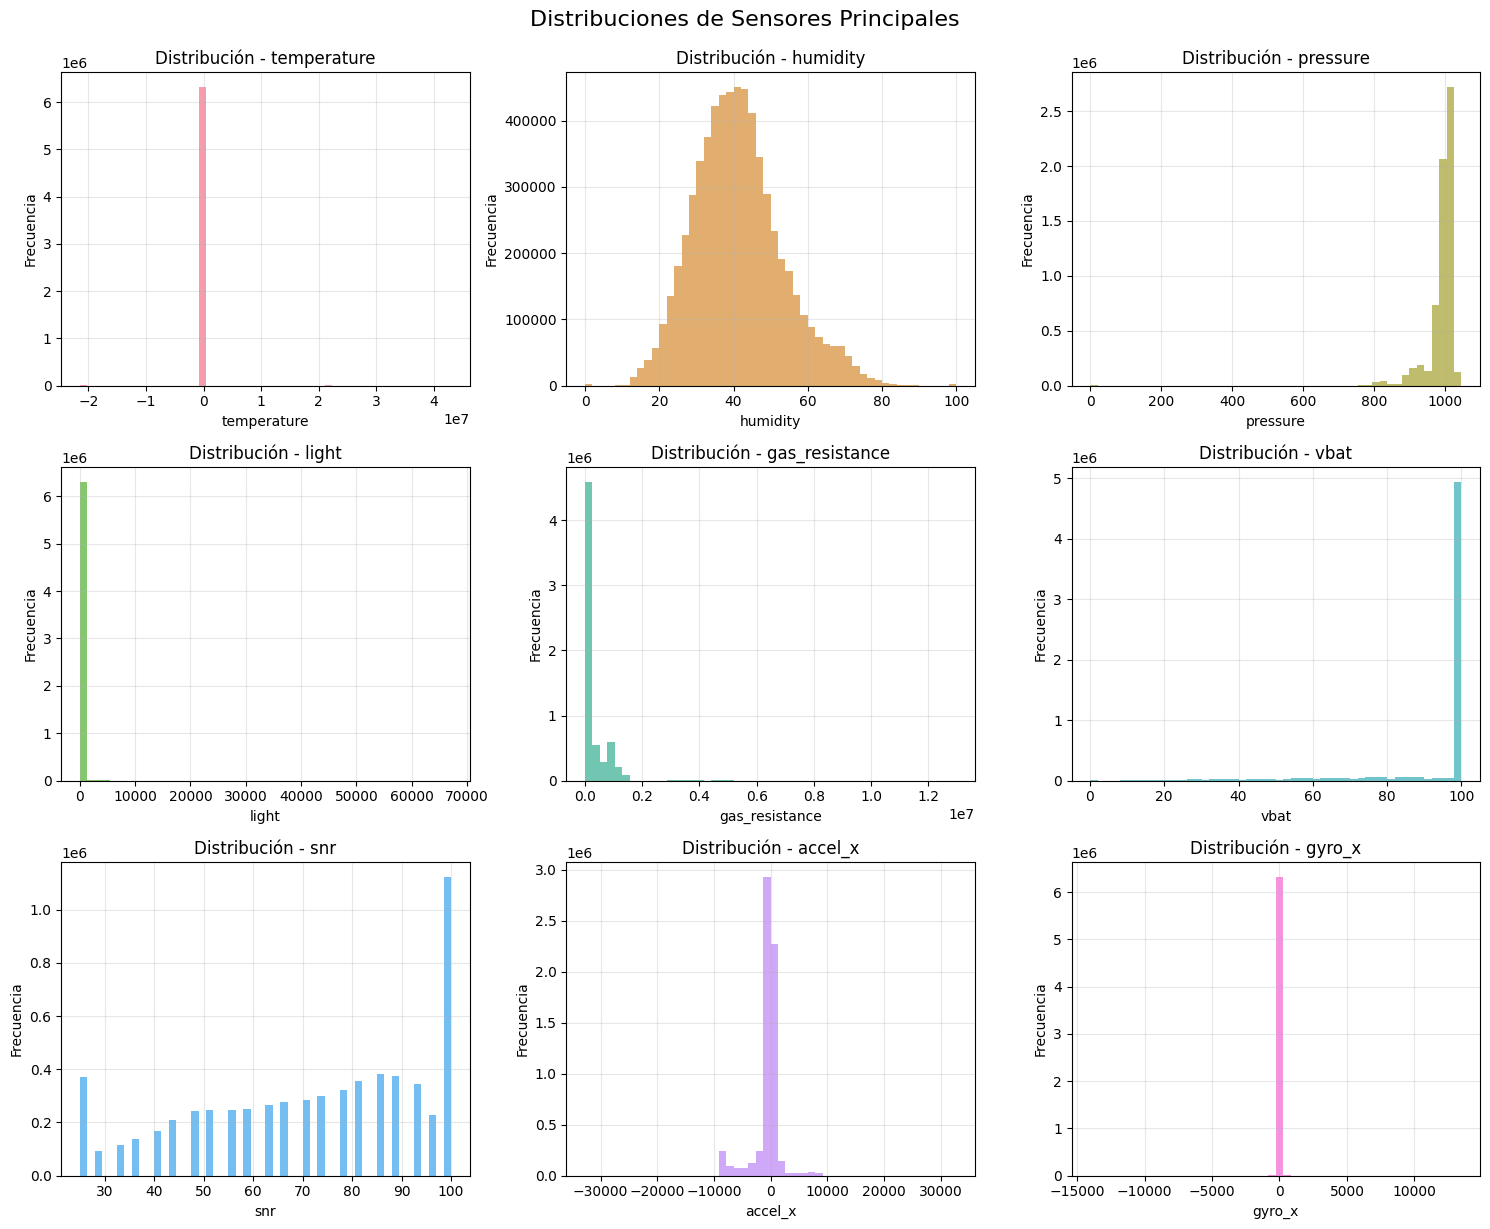

In [13]:
# Visualización de distribuciones de sensores principales
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Seleccionar sensores clave para visualizar
key_sensors = ['temperature', 'humidity', 'pressure', 'light',
               'gas_resistance', 'vbat', 'snr', 'accel_x', 'gyro_x']
# Limitar a 9 para el grid 3x3
key_sensors = [s for s in key_sensors if s in available_sensors][:9]

for i, sensor in enumerate(key_sensors):
    if i < len(axes):
        data = df_expanded[sensor].dropna()
        if len(data) > 0:
            axes[i].hist(data, bins=50, alpha=0.7,
                         color=sns.color_palette("husl", 9)[i])
            axes[i].set_title(f'Distribución - {sensor}')
            axes[i].set_xlabel(sensor)
            axes[i].set_ylabel('Frecuencia')
            axes[i].grid(True, alpha=0.3)

# Ocultar axes sobrantes
for i in range(len(key_sensors), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribuciones de Sensores Principales', fontsize=16, y=1.02)
plt.show()

📊 Mostrando muestra de 5,000 registros para visualización temporal


<Figure size 1500x1000 with 0 Axes>

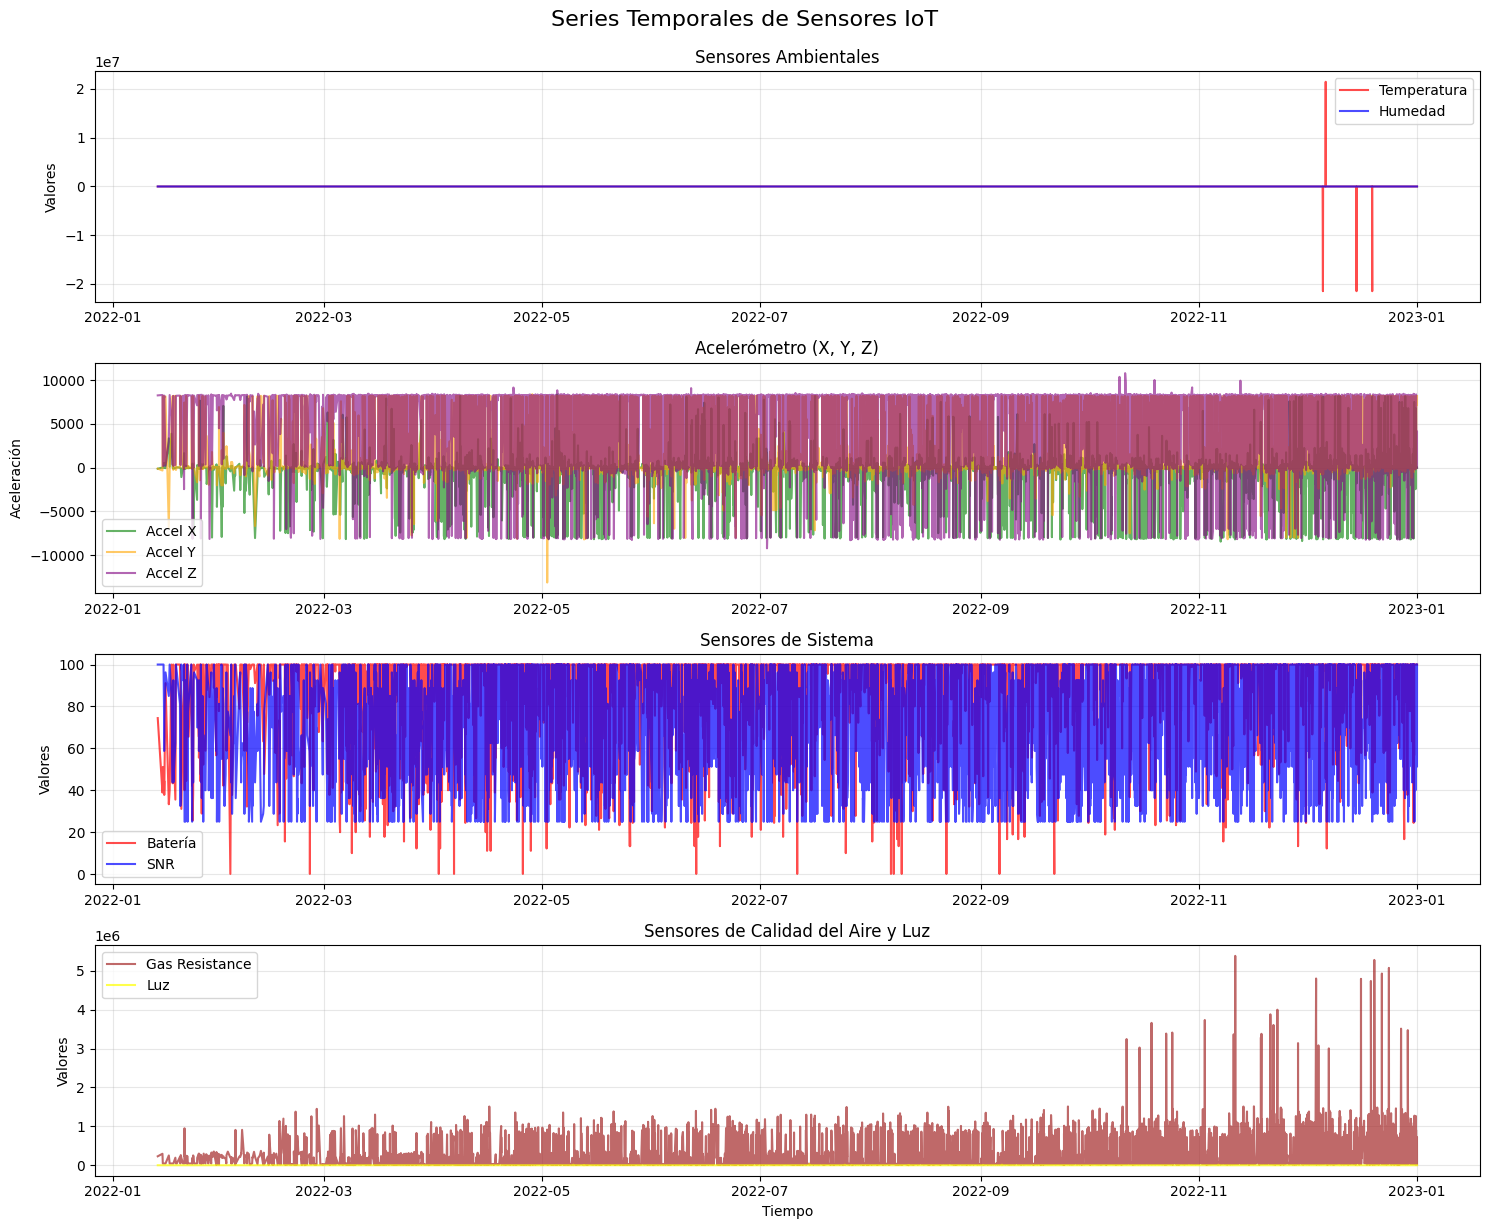

In [14]:
# Visualización de series temporales
plt.figure(figsize=(15, 10))

# Preparar datos ordenados temporalmente
df_time_sorted = df_expanded.sort_values('timestamp_dt')

# Seleccionar una muestra si el dataset es muy grande (para mejorar rendimiento)
if len(df_time_sorted) > 10000:
    sample_size = 5000
    df_sample = df_time_sorted.sample(
        n=sample_size).sort_values('timestamp_dt')
    print(
        f"📊 Mostrando muestra de {sample_size:,} registros para visualización temporal")
else:
    df_sample = df_time_sorted

# Crear subplots para diferentes tipos de sensores
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# 1. Sensores ambientales
if 'temperature' in df_sample.columns:
    axes[0].plot(df_sample['timestamp_dt'], df_sample['temperature'],
                 alpha=0.7, label='Temperatura', color='red')
if 'humidity' in df_sample.columns:
    axes[0].plot(df_sample['timestamp_dt'], df_sample['humidity'],
                 alpha=0.7, label='Humedad', color='blue')
axes[0].set_title('Sensores Ambientales')
axes[0].set_ylabel('Valores')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 2. Sensores de movimiento (acelerómetro)
if 'accel_x' in df_sample.columns:
    axes[1].plot(df_sample['timestamp_dt'], df_sample['accel_x'],
                 alpha=0.6, label='Accel X', color='green')
    axes[1].plot(df_sample['timestamp_dt'], df_sample['accel_y'],
                 alpha=0.6, label='Accel Y', color='orange')
    axes[1].plot(df_sample['timestamp_dt'], df_sample['accel_z'],
                 alpha=0.6, label='Accel Z', color='purple')
axes[1].set_title('Acelerómetro (X, Y, Z)')
axes[1].set_ylabel('Aceleración')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# 3. Sensores de sistema
if 'vbat' in df_sample.columns:
    axes[2].plot(df_sample['timestamp_dt'], df_sample['vbat'],
                 alpha=0.7, label='Batería', color='red')
if 'snr' in df_sample.columns:
    axes[2].plot(df_sample['timestamp_dt'], df_sample['snr'],
                 alpha=0.7, label='SNR', color='blue')
axes[2].set_title('Sensores de Sistema')
axes[2].set_ylabel('Valores')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

# 4. Sensores de calidad del aire y luz
if 'gas_resistance' in df_sample.columns:
    axes[3].plot(df_sample['timestamp_dt'], df_sample['gas_resistance'],
                 alpha=0.7, label='Gas Resistance', color='brown')
if 'light' in df_sample.columns:
    axes[3].plot(df_sample['timestamp_dt'], df_sample['light'],
                 alpha=0.7, label='Luz', color='yellow')
axes[3].set_title('Sensores de Calidad del Aire y Luz')
axes[3].set_ylabel('Valores')
axes[3].set_xlabel('Tiempo')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Series Temporales de Sensores IoT', fontsize=16, y=1.02)
plt.show()

=== ANÁLISIS DE CORRELACIONES ENTRE SENSORES ===


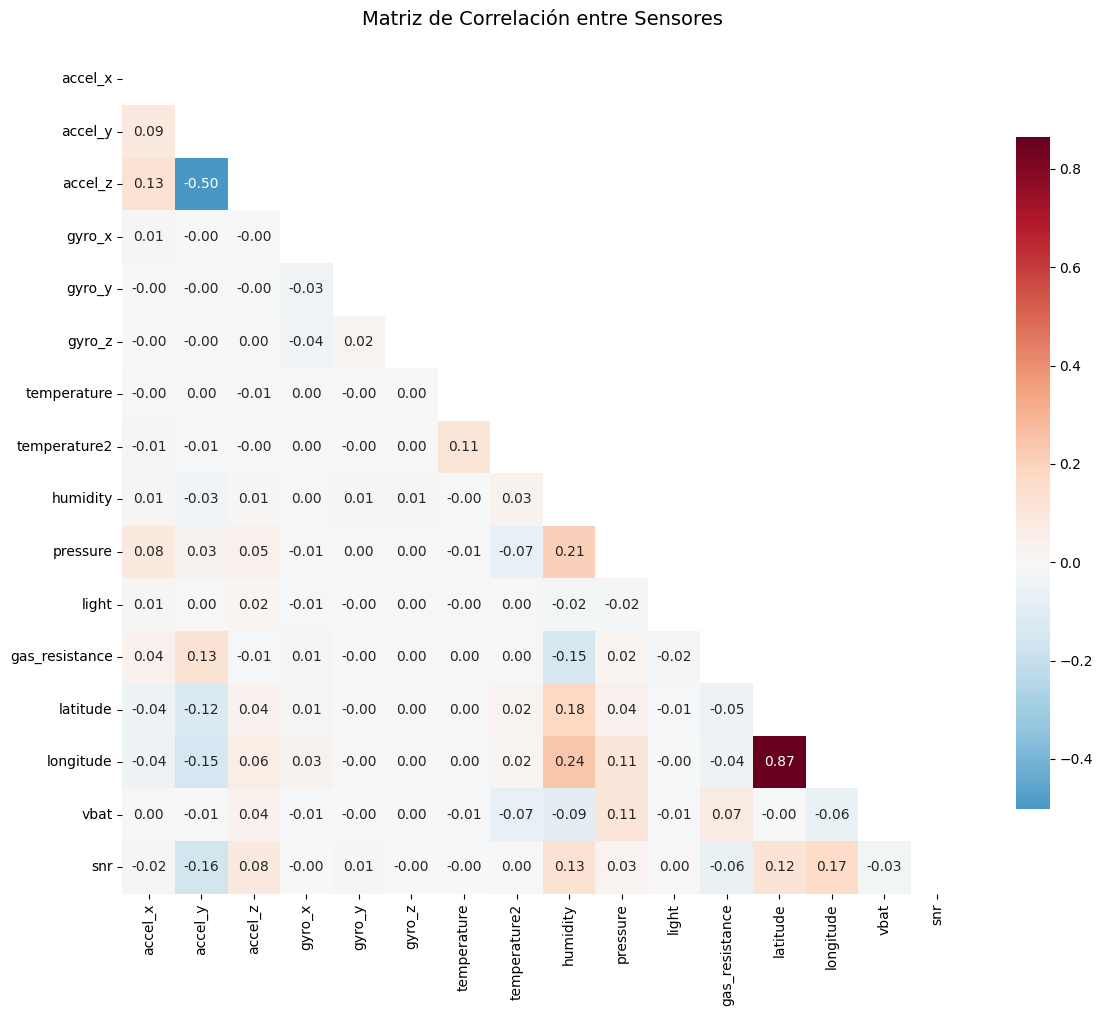


🔍 CORRELACIONES ALTAS (|r| > 0.7):
   • latitude        ↔ longitude       | r =  0.865

🏃 CORRELACIONES ENTRE SENSORES DE MOVIMIENTO:
         accel_x  accel_y  accel_z  gyro_x  gyro_y  gyro_z
accel_x    1.000    0.089    0.130   0.009  -0.001  -0.003
accel_y    0.089    1.000   -0.503  -0.004  -0.000  -0.002
accel_z    0.130   -0.503    1.000  -0.003  -0.003   0.001
gyro_x     0.009   -0.004   -0.003   1.000  -0.035  -0.037
gyro_y    -0.001   -0.000   -0.003  -0.035   1.000   0.023
gyro_z    -0.003   -0.002    0.001  -0.037   0.023   1.000


In [15]:
# Análisis de correlaciones
print("=== ANÁLISIS DE CORRELACIONES ENTRE SENSORES ===")

# Calcular matriz de correlación
correlation_matrix = df_expanded[available_sensors].corr()

# Visualizar matriz de correlación
plt.figure(figsize=(12, 10))
# Máscara para mostrar solo la mitad inferior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            cmap='RdBu_r',
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación entre Sensores', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Identificar correlaciones altas
high_corr_threshold = 0.7
print(f"\n🔍 CORRELACIONES ALTAS (|r| > {high_corr_threshold}):")

# Extraer correlaciones altas
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > high_corr_threshold:
            sensor1 = correlation_matrix.columns[i]
            sensor2 = correlation_matrix.columns[j]
            high_corr_pairs.append((sensor1, sensor2, corr_val))

# Ordenar por valor absoluto de correlación
high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

if high_corr_pairs:
    for sensor1, sensor2, corr in high_corr_pairs:
        print(f"   • {sensor1:15} ↔ {sensor2:15} | r = {corr:6.3f}")
else:
    print("   No se encontraron correlaciones altas")

# Análisis específico de sensores de movimiento
print(f"\n🏃 CORRELACIONES ENTRE SENSORES DE MOVIMIENTO:")
motion_sensors = [col for col in ['accel_x', 'accel_y', 'accel_z',
                                  'gyro_x', 'gyro_y', 'gyro_z'] if col in available_sensors]
if len(motion_sensors) > 1:
    motion_corr = df_expanded[motion_sensors].corr()
    print(motion_corr.round(3))
else:
    print("   Datos de sensores de movimiento no disponibles")

## 5. Detección de Outliers y Patrones Anómalos

In [20]:
# Detección de outliers usando múltiples métodos
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

print("=== DETECCIÓN DE OUTLIERS Y ANOMALÍAS ===")

# 1. Método IQR (Interquartile Range)


def detect_outliers_iqr(data, column_name):
    """Detecta outliers usando el método IQR"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers.index, lower_bound, upper_bound

# 2. Método Z-Score


def detect_outliers_zscore(data, threshold=3):
    """Detecta outliers usando Z-Score"""
    z_scores = np.abs(stats.zscore(data.dropna()))
    outliers_idx = data.dropna().index[z_scores > threshold]
    return outliers_idx


# Análisis de outliers para cada sensor
outlier_summary = []

print("📊 RESUMEN DE OUTLIERS POR SENSOR:")
print("Sensor               | IQR Outliers | Z-Score Outliers | % Total Outliers")
print("-" * 70)

for sensor in available_sensors:
    data = df_expanded[sensor].dropna()
    if len(data) > 10:  # Solo analizar si hay suficientes datos

        # Outliers por IQR
        iqr_outliers_idx, lower, upper = detect_outliers_iqr(data, sensor)

        # Outliers por Z-Score
        zscore_outliers_idx = detect_outliers_zscore(data)

        # Combinar outliers (unión de ambos métodos)
        combined_outliers = set(iqr_outliers_idx) | set(zscore_outliers_idx)

        outlier_percentage = len(combined_outliers) / len(data) * 100

        print(f"{sensor:20} | {len(iqr_outliers_idx):11d} | {len(zscore_outliers_idx):15d} | {outlier_percentage:13.2f}%")

        outlier_summary.append({
            'sensor': sensor,
            'iqr_outliers': len(iqr_outliers_idx),
            'zscore_outliers': len(zscore_outliers_idx),
            'combined_outliers': len(combined_outliers),
            'percentage': outlier_percentage,
            'lower_bound': lower,
            'upper_bound': upper
        })

=== DETECCIÓN DE OUTLIERS Y ANOMALÍAS ===
📊 RESUMEN DE OUTLIERS POR SENSOR:
Sensor               | IQR Outliers | Z-Score Outliers | % Total Outliers
----------------------------------------------------------------------
accel_x              |     1618689 |          363270 |         25.55%
accel_y              |       16652 |             988 |          0.26%
accel_z              |          83 |             177 |          0.00%
gyro_x               |      280684 |           14889 |          4.43%
gyro_y               |      156598 |           14179 |          2.47%
gyro_z               |      264802 |           14160 |          4.18%
temperature          |      934717 |            8658 |         14.75%
temperature2         |      308988 |           10921 |          4.88%
humidity             |      108699 |           26068 |          1.72%
pressure             |      576323 |          104310 |          9.10%
light                |      825871 |           20074 |         13.04%
gas_resis

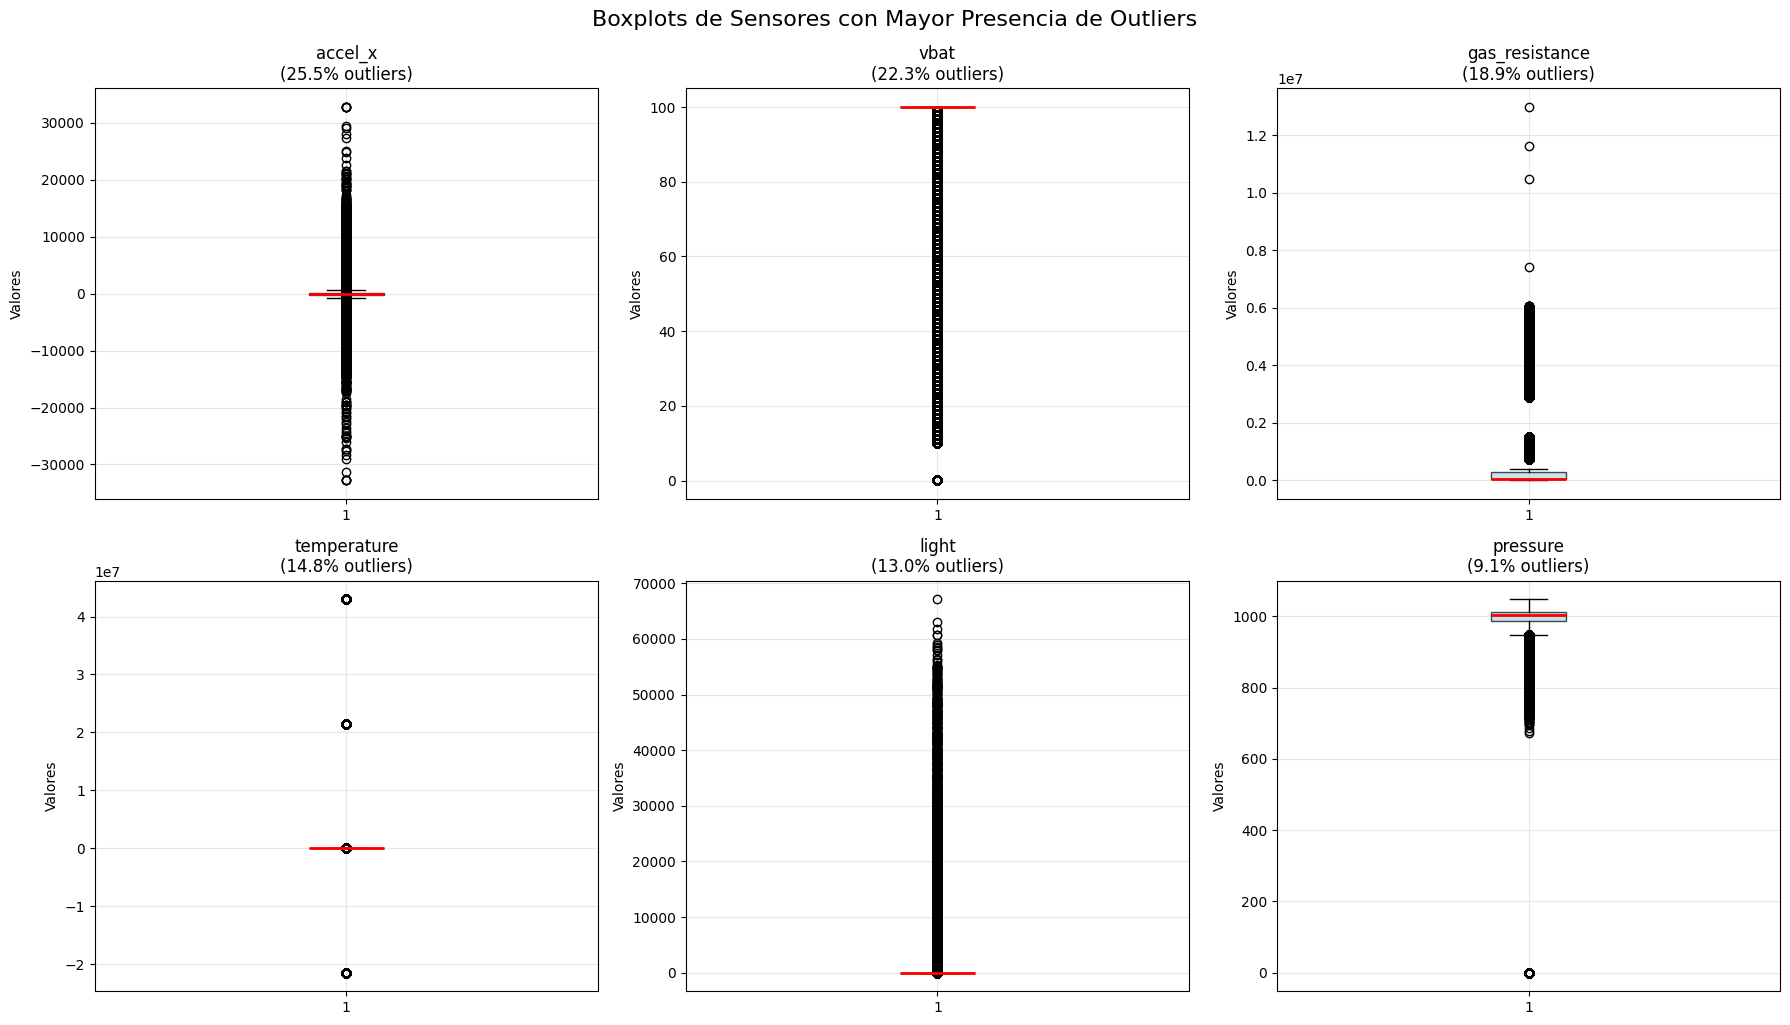


🤖 DETECCIÓN DE ANOMALÍAS MULTIVARIABLES (ISOLATION FOREST):
   • Total de muestras analizadas: 6,335,703
   • Anomalías detectadas: 633,569 (10.00%)
   • Sensores utilizados: 16 (accel_x, accel_y, accel_z, gyro_x, gyro_y...)


In [21]:
# Visualización de outliers con boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Seleccionar 6 sensores con más outliers para visualizar
outlier_df = pd.DataFrame(outlier_summary)
top_outlier_sensors = outlier_df.nlargest(6, 'percentage')['sensor'].tolist()

for i, sensor in enumerate(top_outlier_sensors):
    if i < len(axes):
        data = df_expanded[sensor].dropna()
        axes[i].boxplot(data, patch_artist=True,
                        boxprops=dict(facecolor='lightblue', alpha=0.7),
                        medianprops=dict(color='red', linewidth=2))
        axes[i].set_title(
            f'{sensor}\n({outlier_df[outlier_df.sensor == sensor].percentage.iloc[0]:.1f}% outliers)')
        axes[i].set_ylabel('Valores')
        axes[i].grid(True, alpha=0.3)

# Ocultar axes sobrantes
for i in range(len(top_outlier_sensors), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.suptitle('Boxplots de Sensores con Mayor Presencia de Outliers',
             fontsize=16, y=1.02)
plt.show()

# Detección de anomalías multivariables usando Isolation Forest
print(f"\n🤖 DETECCIÓN DE ANOMALÍAS MULTIVARIABLES (ISOLATION FOREST):")

# Preparar datos para Isolation Forest (solo sensores numéricos)
numeric_sensors = [
    col for col in available_sensors if df_expanded[col].dtype in ['int64', 'float64']]
X = df_expanded[numeric_sensors].dropna()

if len(X) > 100:  # Solo si hay suficientes datos
    # Normalizar los datos
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Aplicar Isolation Forest
    # 10% de anomalías esperadas
    iso_forest = IsolationForest(contamination=0.1, random_state=42)
    anomaly_labels = iso_forest.fit_predict(X_scaled)

    # Contar anomalías
    anomalies = np.sum(anomaly_labels == -1)
    total_samples = len(anomaly_labels)
    anomaly_percentage = anomalies / total_samples * 100

    print(f"   • Total de muestras analizadas: {total_samples:,}")
    print(
        f"   • Anomalías detectadas: {anomalies:,} ({anomaly_percentage:.2f}%)")
    print(
        f"   • Sensores utilizados: {len(numeric_sensors)} ({', '.join(numeric_sensors[:5])}{'...' if len(numeric_sensors) > 5 else ''})")

    # Guardar resultados de anomalías en el dataframe
    df_expanded.loc[X.index, 'isolation_forest_anomaly'] = anomaly_labels

else:
    print("   • Datos insuficientes para análisis multivariable")

In [22]:
# Generar resumen ejecutivo de insights
print("=" * 80)
print("🎯 RESUMEN EJECUTIVO - INSIGHTS DEL DATASET PEBBLE")
print("=" * 80)

# Estadísticas generales
total_records = len(df_expanded)
total_devices = df_expanded['imei'].nunique()
time_span = df_expanded['timestamp_dt'].max(
) - df_expanded['timestamp_dt'].min()
avg_interval = df_sorted['timestamp_dt'].diff().dropna().mean()

print(f"\n📊 CARACTERÍSTICAS GENERALES DEL DATASET:")
print(f"   • Total de registros: {total_records:,}")
print(f"   • Número de dispositivos únicos: {total_devices}")
print(f"   • Período de datos: {time_span}")
print(f"   • Intervalo promedio entre mediciones: {avg_interval}")
print(f"   • Número de sensores analizados: {len(available_sensors)}")

# Análisis de calidad de datos
missing_data_sensors = [
    col for col in available_sensors if df_expanded[col].isnull().sum() > 0]
high_outlier_sensors = [item['sensor']
                        for item in outlier_summary if item['percentage'] > 10]

print(f"\n🔍 CALIDAD DE LOS DATOS:")
print(
    f"   • Sensores con datos faltantes: {len(missing_data_sensors)} de {len(available_sensors)}")
print(f"   • Sensores con >10% outliers: {len(high_outlier_sensors)}")
if high_outlier_sensors:
    print(
        f"     → Sensores problemáticos: {', '.join(high_outlier_sensors[:3])}{'...' if len(high_outlier_sensors) > 3 else ''}")

# Resumen de correlaciones importantes
if high_corr_pairs:
    print(f"\n🔗 CORRELACIONES SIGNIFICATIVAS:")
    print(
        f"   • Pares de sensores altamente correlacionados: {len(high_corr_pairs)}")
    if high_corr_pairs:
        top_corr = high_corr_pairs[0]
        print(
            f"   • Mayor correlación: {top_corr[0]} ↔ {top_corr[1]} (r = {top_corr[2]:.3f})")

print("\n" + "=" * 80)
print("💡 RECOMENDACIONES PARA EL PIPELINE DE AWS")
print("=" * 80)

🎯 RESUMEN EJECUTIVO - INSIGHTS DEL DATASET PEBBLE

📊 CARACTERÍSTICAS GENERALES DEL DATASET:
   • Total de registros: 6,335,703
   • Número de dispositivos únicos: 387
   • Período de datos: 22446 days 13:15:55
   • Intervalo promedio entre mediciones: 0 days 00:05:06.103752196
   • Número de sensores analizados: 16

🔍 CALIDAD DE LOS DATOS:
   • Sensores con datos faltantes: 0 de 16
   • Sensores con >10% outliers: 5
     → Sensores problemáticos: accel_x, temperature, light...

🔗 CORRELACIONES SIGNIFICATIVAS:
   • Pares de sensores altamente correlacionados: 1
   • Mayor correlación: latitude ↔ longitude (r = 0.865)

💡 RECOMENDACIONES PARA EL PIPELINE DE AWS


In [23]:
print("🏗️ ARQUITECTURA DEL PIPELINE:")
print("   1. INGESTA DE DATOS (AWS IoT Core + Kinesis Data Streams):")
print(
    f"      → Configurar para manejar ~{total_records/time_span.total_seconds()*3600:.0f} registros/hora")
print(
    f"      → Planificar escalabilidad para {total_devices} dispositivos iniciales")
print(
    f"      → Implementar buffering para intervalos irregulares de {avg_interval}")

print("\n   2. PROCESAMIENTO EN TIEMPO REAL (Kinesis Data Analytics + Apache Flink):")
print("      → Implementar ventanas deslizantes para análisis temporal")
print("      → Configurar estado para mantener historial de normalidad por dispositivo")
if missing_data_sensors:
    print(
        f"      → Implementar manejo de datos faltantes para {len(missing_data_sensors)} sensores")

print("\n   3. DETECCIÓN DE ANOMALÍAS:")
print("      → Algoritmo recomendado: Random Cut Forest (nativo en Kinesis Analytics)")
print("      → Configuración multivariable para aprovechar correlaciones entre sensores")
if high_outlier_sensors:
    print(
        f"      → Prefiltraje de outliers para sensores: {', '.join(high_outlier_sensors[:2])}")
print("      → Umbrales adaptativos por tipo de sensor y dispositivo")

print("\n   4. ALMACENAMIENTO Y VISUALIZACIÓN:")
print("      → Amazon Timestream para series temporales de alta frecuencia")
print("      → Amazon S3 para datos históricos y entrenamiento de modelos")
print("      → Amazon QuickSight/Grafana para dashboards en tiempo real")

print("\n🔧 CONSIDERACIONES TÉCNICAS ESPECÍFICAS:")

print(f"\n   • PREPROCESAMIENTO:")
print("     → Parsear arrays de acelerómetro/giroscopio en componentes individuales")
print("     → Normalización Z-score por tipo de sensor")
print("     → Validación de rangos físicamente posibles")

print(f"\n   • VENTANAS TEMPORALES:")
print(f"     → Ventana base: {avg_interval} (frecuencia de muestreo)")
print("     → Ventana de detección: 5-10 minutos para patrones temporales")
print("     → Ventana de entrenamiento: 24 horas para baseline de normalidad")

if high_corr_pairs:
    print(f"\n   • CORRELACIONES PARA DETECCIÓN:")
    for i, (s1, s2, corr) in enumerate(high_corr_pairs[:3]):
        print(f"     → Validar consistencia: {s1} vs {s2} (r={corr:.2f})")

print(f"\n   • ALERTAS Y UMBRALES:")
outlier_percentages = [item['percentage'] for item in outlier_summary]
avg_outlier_rate = np.mean(outlier_percentages) if outlier_percentages else 5
print(
    f"     → Umbral base de anomalías: {avg_outlier_rate:.1f}% (basado en análisis histórico)")
print("     → Alertas graduales: INFO (5%), WARNING (10%), CRITICAL (20%)")
print("     → Correlación con metadatos (batería baja, señal débil)")

print("\n🎯 MÉTRICAS DE ÉXITO DEL PIPELINE:")
print("   • Latencia < 30 segundos desde ingesta hasta detección")
print("   • Throughput escalable hasta 10x el volumen actual")
print("   • Tasa de falsos positivos < 5%")
print("   • Disponibilidad > 99.9%")
print("   • Coste operativo < $0.01 por 1000 registros procesados")

print("\n" + "=" * 80)
print("✅ ANÁLISIS EXPLORATORIO COMPLETADO")
print("   Dataset caracterizado y listo para implementación del pipeline AWS")
print("=" * 80)

🏗️ ARQUITECTURA DEL PIPELINE:
   1. INGESTA DE DATOS (AWS IoT Core + Kinesis Data Streams):
      → Configurar para manejar ~12 registros/hora
      → Planificar escalabilidad para 387 dispositivos iniciales
      → Implementar buffering para intervalos irregulares de 0 days 00:05:06.103752196

   2. PROCESAMIENTO EN TIEMPO REAL (Kinesis Data Analytics + Apache Flink):
      → Implementar ventanas deslizantes para análisis temporal
      → Configurar estado para mantener historial de normalidad por dispositivo

   3. DETECCIÓN DE ANOMALÍAS:
      → Algoritmo recomendado: Random Cut Forest (nativo en Kinesis Analytics)
      → Configuración multivariable para aprovechar correlaciones entre sensores
      → Prefiltraje de outliers para sensores: accel_x, temperature
      → Umbrales adaptativos por tipo de sensor y dispositivo

   4. ALMACENAMIENTO Y VISUALIZACIÓN:
      → Amazon Timestream para series temporales de alta frecuencia
      → Amazon S3 para datos históricos y entrenamiento 